In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Import data
df = pd.read_csv('./data/data.csv')
# Source: https://www.kaggle.com/CooperUnion/cardataset
# Remove null engine hp 
df = df[~df['Engine HP'].isnull()]
df = df[~df['Engine Cylinders'].isnull()]

In [16]:
# Predict Price using Engine HP as Dependent variable.
HP = 'Engine HP'
PRICE = 'MSRP'
model = LinearRegression(fit_intercept=True)

x = df[HP].values.reshape(-1, 1) # Use reshape if using only one variable as dependent variable.
y = df[PRICE].values
# Fit The model to the data
model.fit(x, y)
print(model.intercept_) 
print(model.coef_)

# Create predict using our model and the values in X:
y_hat = model.predict(x)

# Calculate residuals:
residuals = y - y_hat

# MSE
print(f'{mean_squared_error(y, y_hat):,}')

-50651.97908896372
[365.62160089]
2,042,509,421.349111


### Regression model using Engine HP as the regressor
${Y}_{i} = {-50.651} +  {365}X_{i1} + {\varepsilon}$

In [19]:
df.head(2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


## Practice 1:
**a.** Run the regression using Year as dependent variable, did the MSE go up or down copared to using Engine HP as Independent variable (aka regressor)? Is this what you expected? Why?<br  />
    **b.** Create a new column in the dataframe called "is_Bugatti" with 1 if the make == "Bugatti" 0 otherwise.<br  />&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Run a new regression using "is_Bugatti" column the regressor. How does the MSE compare against the prior ones.<br  />&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Calculate 
${\beta}_{0} $ and ${\beta}_{1}$, write the regression model equation, how do you interpret ${\beta}_{0} $ and ${\beta}_{1}$.


In [ ]:
# a.

In [ ]:
# b.

# Practice 2

Suppose there is a company that sells tickets to shows and our goal is to find out how is their pricing methodology.
We have been told that the price is a function that depends only on age.
We were able to buy 4 tickets online for people with different ages.

In [28]:
ages = [15, 20, 30, 34, 50, 64,  66, 77, 80, 85, 90]
prices= [130, 140, 160, 168, 200, 228, 133.0, 138.5, 140.0, 142.5, 145.0]

transform = lambda x: 100 + (2 * x) if x < 65 else 100 + (x * 0.5)

In [26]:
prices = []
for i in ages:
    prices.append(transform(i))

In [27]:
prices

[130, 140, 160, 168, 200, 228, 133.0, 138.5, 140.0, 142.5, 145.0]

In [32]:
df = pd.DataFrame(list(zip(ages, prices)), columns=['age', 'price'])
x = df['age'].values.reshape(-1,1)
y = df['price']

158.004181305359
[-0.02135187]
0.00034902129143743466


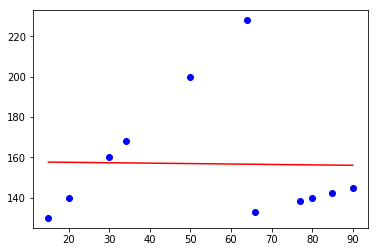

In [30]:
model = LinearRegression(fit_intercept=True)
model.fit(x, y)

# Create predict using our model and the values in X:
y_hat = model.predict(x)

# Plot those predicted values, which is the same as plotting the model:
plt.plot(x, y,  'bo')
plt.plot(x, y_hat, 'r');

print(model.intercept_) 
print(model.coef_)

# R2 score
print(r2_score(y, y_hat))

In [35]:
# Lets Create a categorical Variable to indicate that age is over 65
df['is_over_65'] = df['age'] > 65

In [36]:
df

,age,price,is_over_65
0,15,130.0,False
1,20,140.0,False
2,30,160.0,False
3,34,168.0,False
4,50,200.0,False
5,64,228.0,False
6,66,133.0,True
7,77,138.5,True
8,80,140.0,True
9,85,142.5,True


In [38]:
x = df[['age', 'is_over_65']]
y = df['price']

108.57333594170298
[   1.75849758 -108.74974324]
0.9352602066455488


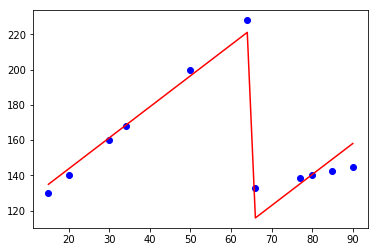

In [39]:
model = LinearRegression(fit_intercept=True)
model.fit(x, y)

# Create predict using our model and the values in X:
y_hat = model.predict(x)

# Plot those predicted values, which is the same as plotting the model:
plt.plot(x['age'], y,  'bo')
plt.plot(x['age'], y_hat, 'r');

print(model.intercept_) 
print(model.coef_)

# R2 score
print(r2_score(y, y_hat))